# Data Augmentation

In [1]:
from imblearn.over_sampling import SMOTENC, ADASYN
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
file_path = "data/CRFs.csv"
data = pd.read_csv(file_path)
data = data.replace("n/a", np.nan).dropna()

In [3]:
def add_noise(series, noise_level):
    return series + np.random.normal(0, noise_level, size=series.shape)

In [4]:
data['SBP'] = add_noise(data['SBP'], 5) # 5mmHG
data['DBP'] = add_noise(data['DBP'], 3) # 3 mmHG
data['Weight'] = add_noise(data['Weight'], 1.5) # 1.5kg
data['Height'] = add_noise(data['Height'], 2) # 2cm

In [5]:
data['SBP'] = np.clip(data['SBP'], 90, 200)
data['DBP'] = np.clip(data['DBP'], 50, 120)
data['Weight'] = np.clip(data['Weight'], 30, 200)
data['Height'] = np.clip(data['Height'], 140, 200)

In [6]:
data['Gender'] = data['Gender'].str.upper().map({'M': 0, 'F': 1})
data['Smoker'] = data['Smoker'].str.upper().map({'NO': 0, 'YES': 1})
data.head()

,Record,Gender,Age,Weight,Height,BSA,BMI,Smoker,SBP,DBP,IMT MAX,LVMi,EF,Vascular event
0,1911,0,56,102.397042,181.843492,2.29,32.41,1,135.038640,82.653923,4.0,123.0,66.0,none
2,2019,1,80,80.391854,167.104505,1.91,29.38,0,174.551655,76.037537,2.5,164.0,56.0,none
3,2020,0,77,88.190734,177.067355,2.09,27.77,0,143.001174,82.998282,2.7,115.0,67.0,none
4,2025,1,66,78.183280,176.162163,1.97,26.42,0,111.045712,66.428062,1.5,98.0,66.0,none
5,2031,0,84,72.504206,173.162071,1.84,24.91,0,117.856537,66.788366,2.6,147.0,51.0,none


In [ ]:
X = data[['Age', 'Weight', 'Height', 'SBP', 'DBP', 'Smoker', 'Gender']]
y = data['Vascular event']
smote = SMOTENC(sampling_strategy={'none':104, 'myocardial infarction': 104, 'stroke': 104, 'syncope': 104}, random_state=42, k_neighbors=2, categorical_features=['Gender', 'Smoker'])
X_resampled, y_resampled = smote.fit_resample(X, y)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_mask = lof.fit_predict(X_resampled) == 1
X_smote_cleaned, y_smote_cleaned = X_resampled[outlier_mask], y_resampled[outlier_mask]
augmented_data = pd.DataFrame(X_resampled, columns=X.columns)
augmented_data['Vascular event'] = y_resampled

In [8]:
print("Balanced class distribution:")
print(augmented_data['Vascular event'].value_counts())

Balanced class distribution:
Vascular event
none                     104
myocardial infarction    104
stroke                   104
syncope                  104
Name: count, dtype: int64


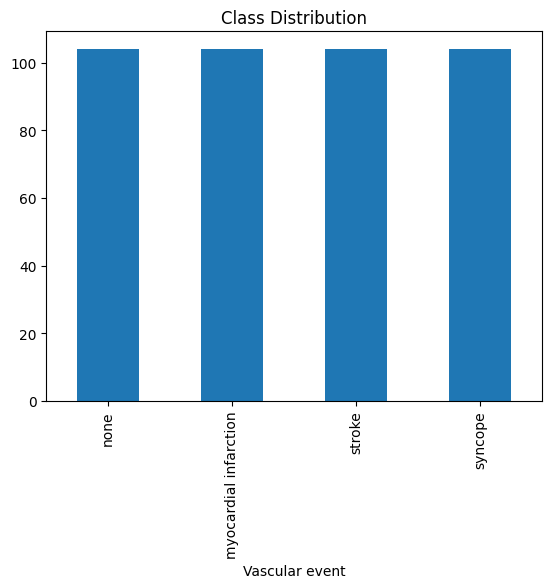

In [9]:
augmented_data['Vascular event'].value_counts().plot(kind='bar', title="Class Distribution")
plt.show()

In [10]:
augmented_data.to_csv("augmented_dataset.csv", index=False)
print("Augmented dataset saved to 'augmented_dataset.csv'")

Augmented dataset saved to 'augmented_dataset.csv'
